In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

In [4]:
food

Antecedent: food

In [5]:
food.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
service

Antecedent: service

In [7]:
service.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
tip = ctrl.Consequent(np.arange(0, 21, 1), 'tip')

In [9]:
tip

Consequent: tip

In [10]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [11]:
food.automf(number = 3, names = ['bad', 'decent', 'great'])
service.automf(number = 3, names = ['bad', 'decent', 'great'])

In [12]:
food.view()

C:\Users\james\anaconda3\envs\nlp_course\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [13]:
food['great'].view()

In [14]:
food['bad'].view()

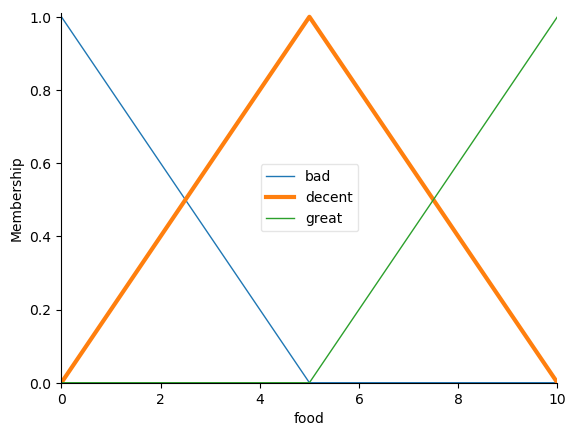

In [15]:
food['decent'].view()

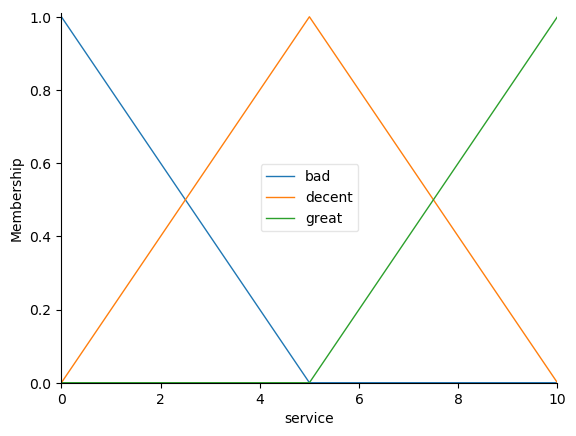

In [16]:
service.view()

In [17]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

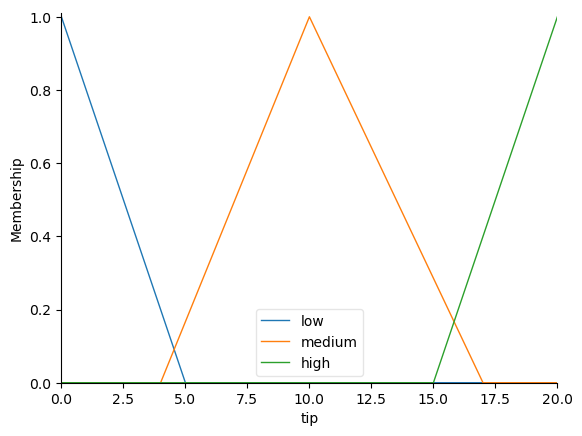

In [18]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 5])
tip['medium'] = fuzz.trimf(tip.universe, [4, 10, 17])
tip['high'] = fuzz.trimf(tip.universe, [15, 20, 20])
tip.view()

In [19]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(service['great'] | food['great'], tip['high'])

In [20]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

In [21]:
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

In [26]:
fuzzy_system.input['food'] = 5
fuzzy_system.input['service'] = 3
fuzzy_system.compute()

8.483663833805478


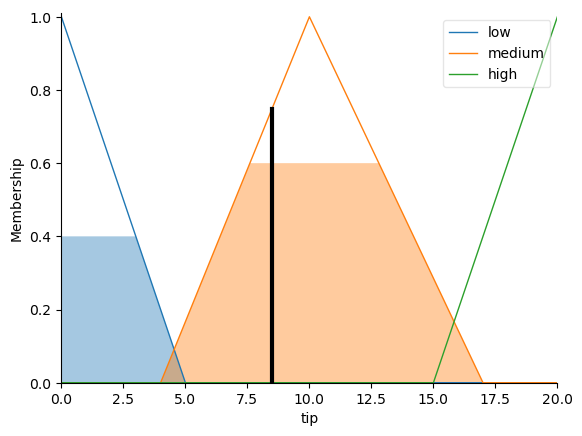

In [27]:
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)